In [1]:
import numpy as np

In [2]:
from matplotlib.pyplot import plot

In [3]:
from matplotlib.pyplot import show

In [4]:
#Load data

bhp = np.loadtxt('BHP.csv',delimiter=',',usecols=(6),unpack=True)

In [5]:
bhp

array([93.72, 95.64, 94.56, 93.3 , 93.93, 92.39, 92.11, 92.36, 91.76,
       93.91, 94.6 , 93.27, 94.43, 96.02, 95.76, 94.47, 94.34, 92.22,
       88.31, 89.59, 89.02, 86.95, 84.88, 87.38, 88.56, 89.59, 88.71,
       90.02, 91.26, 90.67])

In [6]:
bhp[:-1]

array([93.72, 95.64, 94.56, 93.3 , 93.93, 92.39, 92.11, 92.36, 91.76,
       93.91, 94.6 , 93.27, 94.43, 96.02, 95.76, 94.47, 94.34, 92.22,
       88.31, 89.59, 89.02, 86.95, 84.88, 87.38, 88.56, 89.59, 88.71,
       90.02, 91.26])

In [7]:
bhp == bhp[:-1]

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [8]:
help(np.diff)

Help on function diff in module numpy:

diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    Calculate the n-th discrete difference along the given axis.
    
    The first difference is given by ``out[n] = a[n+1] - a[n]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced. If zero, the input
        is returned as-is.
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.
    prepend, append : array_like, optional
        Values to prepend or append to "a" along axis prior to
        performing the difference.  Scalar values are expanded to
        arrays with length 1 in the direction of axis and the shape
        of the input array in along all other axes.  Otherwise the
        dimension and shape must match "a" except along ax

In [9]:
bhp_return = np.diff(bhp)/bhp[:-1]

In [10]:
# find out returns for VALE as well

# 1. LAOD it 

vale = np.loadtxt('VALE.csv',delimiter=',',usecols=(6),unpack=True)

In [11]:
vale 


array([34.37, 35.13, 35.14, 35.31, 35.57, 35.03, 33.44, 33.94, 34.21,
       34.27, 34.23, 33.76, 34.32, 34.87, 34.5 , 33.23, 33.29, 32.88,
       31.91, 32.17, 32.44, 31.91, 31.04, 31.51, 32.14, 32.42, 32.25,
       32.7 , 32.36, 32.34])

In [12]:
vale_returns = np.diff(vale)/vale[:-1]

In [13]:
vale_returns

array([ 0.02211231,  0.00028466,  0.00483779,  0.00736335, -0.01518133,
       -0.04538967,  0.01495215,  0.00795522,  0.00175387, -0.0011672 ,
       -0.01373065,  0.01658768,  0.01602564, -0.01061084, -0.03681159,
        0.0018056 , -0.01231601, -0.02950122,  0.00814792,  0.00839291,
       -0.01633785, -0.02726418,  0.01514175,  0.01999365,  0.00871189,
       -0.00524368,  0.01395349, -0.01039755, -0.00061805])

In [14]:
np.size(vale_returns)

29

In [15]:
np.size(vale)

30

In [16]:
#use cov function to find covariance


covariance = np.cov(bhp_return,vale_returns)
print("Covariance",covariance)

Covariance [[0.00028179 0.00019766]
 [0.00019766 0.00030123]]


In [18]:
print("Covariance Diagonal values:",covariance.diagonal())

Covariance Diagonal values: [0.00028179 0.00030123]


In [19]:
#compute sum of diagonal elements by trace function


print("Covariance Trace :",covariance.trace())

Covariance Trace : 0.000583023549920278


# Correlation is given by - 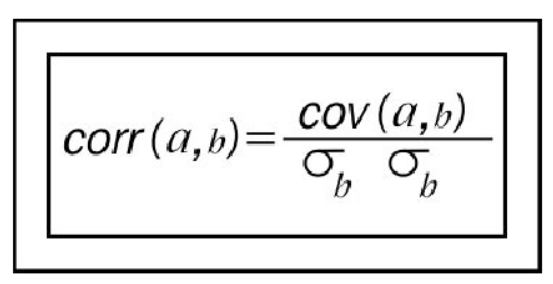

In [22]:
print(covariance/(bhp_return.std()*vale_returns.std()))

[[1.00173366 0.70264666]
 [0.70264666 1.0708476 ]]


In [23]:
# to cal correlation coeeficient

print("Correlation Coefficient",np.corrcoef(bhp_return,vale_returns))


Correlation Coefficient [[1.         0.67841747]
 [0.67841747 1.        ]]


In [24]:
# Check whereter teh two stock are in sync or not by cal if there there difference is two std from mean differences

In [25]:
difference = bhp - vale

In [26]:
difference

array([59.35, 60.51, 59.42, 57.99, 58.36, 57.36, 58.67, 58.42, 57.55,
       59.64, 60.37, 59.51, 60.11, 61.15, 61.26, 61.24, 61.05, 59.34,
       56.4 , 57.42, 56.58, 55.04, 53.84, 55.87, 56.42, 57.17, 56.46,
       57.32, 58.9 , 58.33])

In [27]:
avg = np.mean(difference)

In [28]:
avg

58.36833333333333

In [29]:
dev = np.std(difference)

In [30]:
dev

1.8892292667175747

In [32]:
print("Out of sync",np.abs(difference[-1]-avg)>2*dev)

Out of sync False


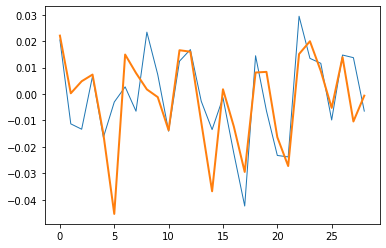

In [33]:
t = np.arange(len(bhp_return))
plot(t, bhp_return,lw = 1)
plot(t, vale_returns,lw = 2)